In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Ülkeler Verisi Analizi ve K-Means Kümeleme

## 🧭 İçindekiler
1. [Kütüphanelerin İçe Aktarılması](#kütüphanelerin-içe-aktarılması)
2. [Veri Yükleme ve İlk İnceleme](#veri-yükleme-ve-ilk-inceleme)
3. [Veri Keşfi (EDA)](#veri-keşfi-eda)
   - [Temel Bilgiler](#temel-bilgiler)
   - [Eksik Değer Analizi](#eksik-değer-analizi)
   - [Tanımlayıcı İstatistikler](#tanımlayıcı-istatistikler)
   - [Veri Türleri ve Kolonlar](#veri-türleri-ve-kolonlar)
4. [Korelasyon Analizi](#korelasyon-analizi)
   - [Korelasyon Matrisi ve Isı Haritası](#korelasyon-matrisi-ve-ısı-haritası)
   - [Clustermap Görselleştirmesi](#clustermap-görselleştirmesi)
5. [Veri Görselleştirmeleri](#veri-görselleştirmeleri)
   - [Gelir ve Yaşam Beklentisi İlişkisi](#gelir-ve-yaşam-beklentisi-ilişkisi)
6. [Veri Ön İşleme](#veri-ön-i̇şleme)
   - [Ülke Kolonunun Kaldırılması](#ülke-kolonunun-kaldırılması)
   - [One-Hot Encoding](#one-hot-encoding)
   - [Ölçekleme (StandardScaler)](#ölçekleme-standardscaler)
7. [K-Means Kümeleme Modeli](#k-means-kümeleme-modeli)
   - [En Uygun K Değerinin Belirlenmesi (Elbow Method)](#en-uygun-k-değerinin-belirlenmesi-elbow-method)
   - [Modelin Uygulanması](#modelin-uygulanması)
   - [Küme Sonuçlarının İncelenmesi](#küme-sonuçlarının-i̇ncelenmesi)
8. [3D K-Means Görselleştirmesi](#3d-k-means-görselleştirmesi)
   - [Income, GDP per Capita ve Life Expectancy İlişkisi](#income-gdp-per-capita-ve-life-expectancy-i̇lişkisi)
   - [Kümelerin Renkli Gösterimi](#kümelerin-renkli-gösterimi)
9. [Sonuç ve Gözlemler](#sonuç-ve-gözlemler)


In [84]:
df = pd.read_csv(filepath_or_buffer='data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [86]:
df.iloc[:20].style.background_gradient(cmap='viridis')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.200000,10.000000,7.580000,44.900000,1610,9.440000,56.200000,5.820000,553
1,Albania,16.600000,28.000000,6.550000,48.600000,9930,4.490000,76.300000,1.650000,4090
2,Algeria,27.300000,38.400000,4.170000,31.400000,12900,16.100000,76.500000,2.890000,4460
3,Angola,119.000000,62.300000,2.850000,42.900000,5900,22.400000,60.100000,6.160000,3530
4,Antigua and Barbuda,10.300000,45.500000,6.030000,58.900000,19100,1.440000,76.800000,2.130000,12200
5,Argentina,14.500000,18.900000,8.100000,16.000000,18700,20.900000,75.800000,2.370000,10300
6,Armenia,18.100000,20.800000,4.400000,45.300000,6700,7.770000,73.300000,1.690000,3220
7,Australia,4.800000,19.800000,8.730000,20.900000,41400,1.160000,82.000000,1.930000,51900
8,Austria,4.300000,51.300000,11.000000,47.800000,43200,0.873000,80.500000,1.440000,46900
9,Azerbaijan,39.200000,54.300000,5.880000,20.700000,16000,13.800000,69.100000,1.920000,5840


In [87]:
df.shape

(167, 10)

In [88]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [90]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [91]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [92]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

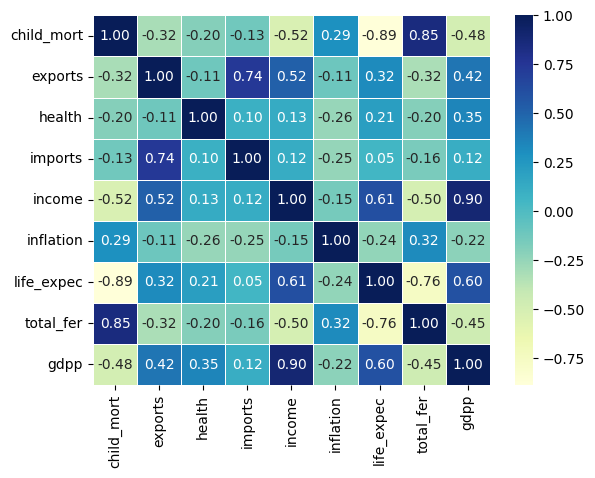

In [93]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)

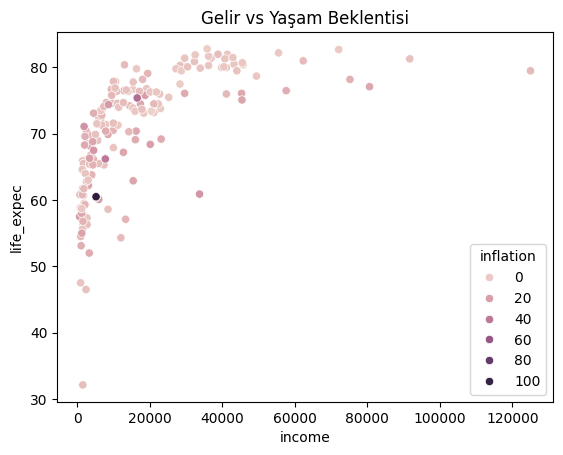

In [94]:
sns.scatterplot(x='income', y='life_expec', data=df, hue='inflation')
plt.title('Gelir vs Yaşam Beklentisi')
plt.show()

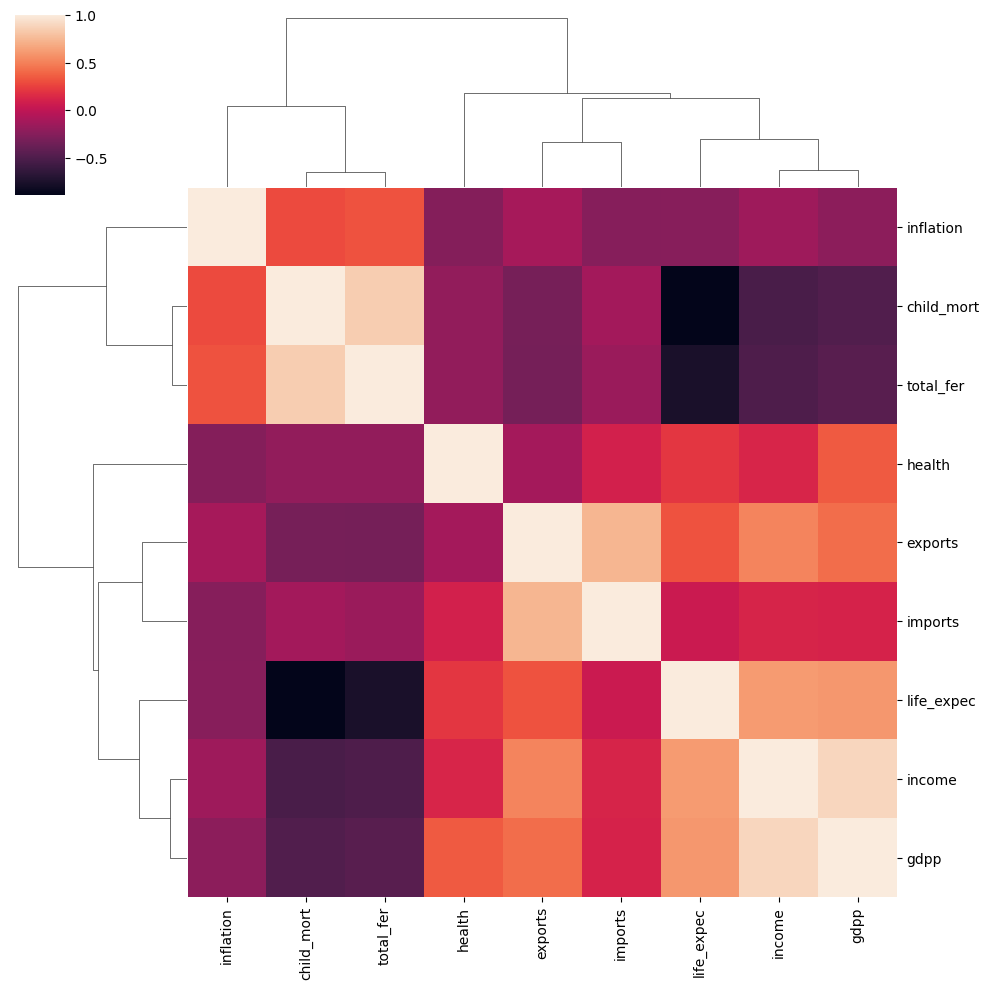

In [95]:
sns.clustermap(corr_matrix)

Veriyi Model İçin Hazırlama

In [96]:
X = df.drop('country', axis=1)
X = pd.get_dummies(X)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

In [99]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


K_Means Model

In [100]:
from sklearn.cluster import KMeans

results = []

for k in range(2,50):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)

    results.append(model.inertia_)

Text(0, 0.5, 'Noktalar Arası Mesafelerin\n Karelerinin Toplamı')

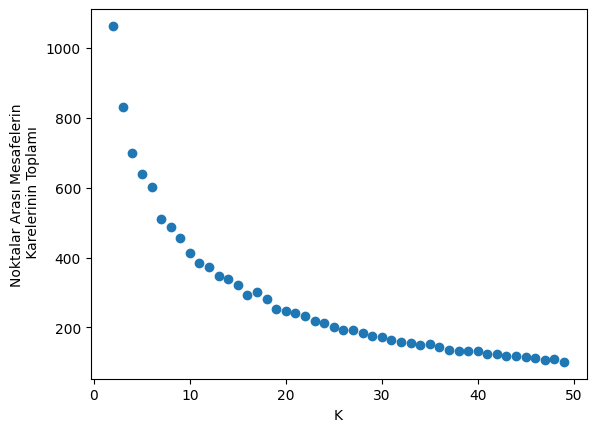

In [101]:
plt.plot(range(2,50), results, "o")
plt.xlabel("K")
plt.ylabel("Noktalar Arası Mesafelerin\n Karelerinin Toplamı")

In [102]:
result_series = pd.Series(results)

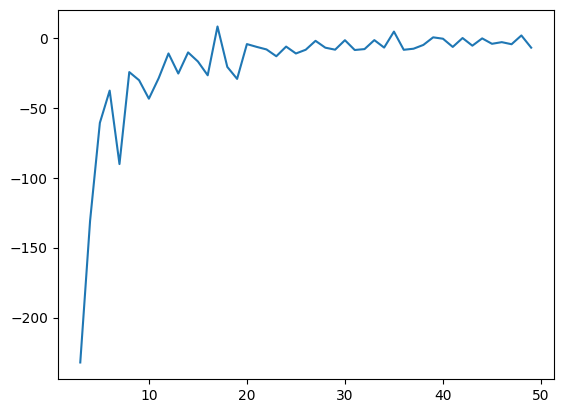

In [103]:
plt.plot(range(2,50), result_series.diff())

<BarContainer object of 48 artists>

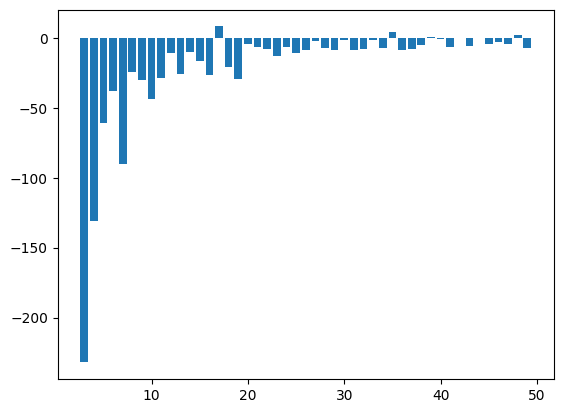

In [104]:
plt.bar(range(2,50), result_series.diff())

In [105]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [106]:
model.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [107]:
X['4 Clusters'] = model.labels_

In [108]:
X.corr()['4 Clusters'].sort_values(ascending=False)

4 Clusters    1.000000
total_fer     0.687842
child_mort    0.685602
inflation     0.129840
health        0.065272
gdpp          0.021302
imports      -0.071969
income       -0.072286
exports      -0.126396
life_expec   -0.547931
Name: 4 Clusters, dtype: float64

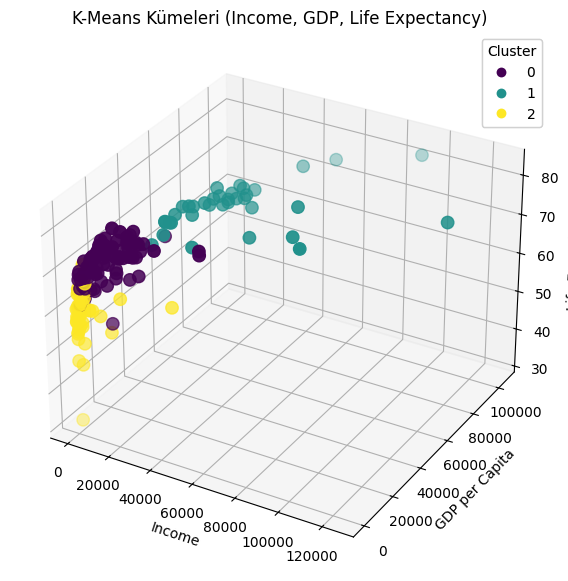

In [111]:
from mpl_toolkits.mplot3d import Axes3D


X = df.select_dtypes(include=['number'])

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means modeli
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 3D Scatter Plot (income, gdpp, life_expec)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['income'],
    df['gdpp'],
    df['life_expec'],
    c=df['cluster'],
    cmap='viridis',
    s=80
)

ax.set_xlabel('Income')
ax.set_ylabel('GDP per Capita')
ax.set_zlabel('Life Expectancy')
plt.title('K-Means Kümeleri (Income, GDP, Life Expectancy)')

# Renk açıklaması
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

Sonuç ve Gözlemler

K-Means kümeleme ile ülkeler gelir, yaşam beklentisi ve ekonomik göstergelere göre gruplandırıldı.

3D görselleştirme, farklı gelişmişlik düzeylerine sahip ülkelerin nasıl ayrıştığını göstermektedir.

Korelasyon analizi, income, gdpp ve life_expec değişkenlerinin pozitif ilişkili olduğunu doğrulamaktadır